<a href="https://colab.research.google.com/github/harsh2k1/LGMVIP-DataScience/blob/main/StockLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Name: Harshpreet Singh
## ʟɢᴍᴠɪᴩᴏᴄᴛᴏʙᴇʀ
## Task-2

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
df=pd.read_csv(path)

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2035.0,1.497137e+02,4.866451e+01,81.10,120.025,141.50,157.175,327.70
High,2035.0,1.519928e+02,4.941311e+01,82.80,122.100,143.40,159.400,328.75
Low,2035.0,1.472939e+02,4.793196e+01,80.00,118.300,139.60,155.150,321.65
Last,2035.0,1.494743e+02,4.873257e+01,81.00,120.075,141.10,156.925,325.95
Close,2035.0,1.494503e+02,4.871204e+01,80.95,120.050,141.25,156.900,325.75
Total Trade Quantity,2035.0,2.335681e+06,2.091778e+06,39610.00,1146444.500,1783456.00,2813594.000,29191015.00
Turnover (Lacs),2035.0,3.899981e+03,4.570768e+03,37.04,1427.460,2512.03,4539.015,55755.08


## Using only the Closed price

In [8]:
df1 = df[['Date','Close']]
df1 = df1.iloc[::-1]
df1.head()

,Date,Close
2034,2010-07-21,121.55
2033,2010-07-22,120.90
2032,2010-07-23,120.65
2031,2010-07-26,117.60
2030,2010-07-27,118.65


In [9]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [10]:
df1.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [11]:
df1 = df1.set_index(['Date'])
df1.head()

,Close
Date,
2010-07-21,121.55
2010-07-22,120.90
2010-07-23,120.65
2010-07-26,117.60
2010-07-27,118.65


# Data Visualization

## Line plot of Closed Price over the years

Text(0, 0.5, 'Closing Price')

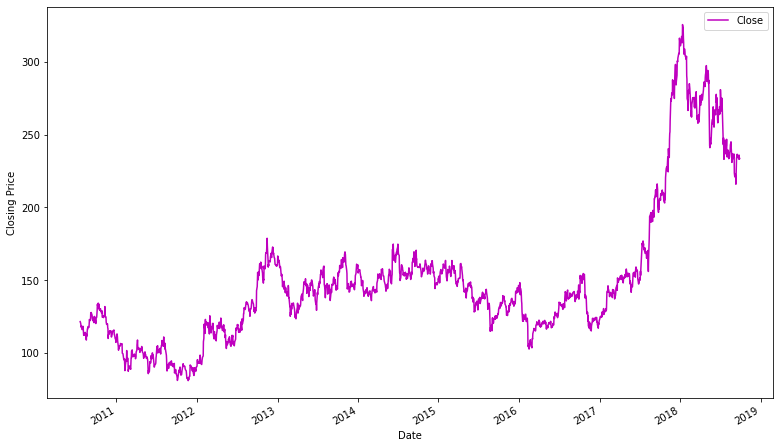

In [12]:
# Line plot of Closed price over the years
df1.plot(figsize = (13,8), color = 'm')
plt.ylabel('Closing Price')

## Distribution of Closing Price

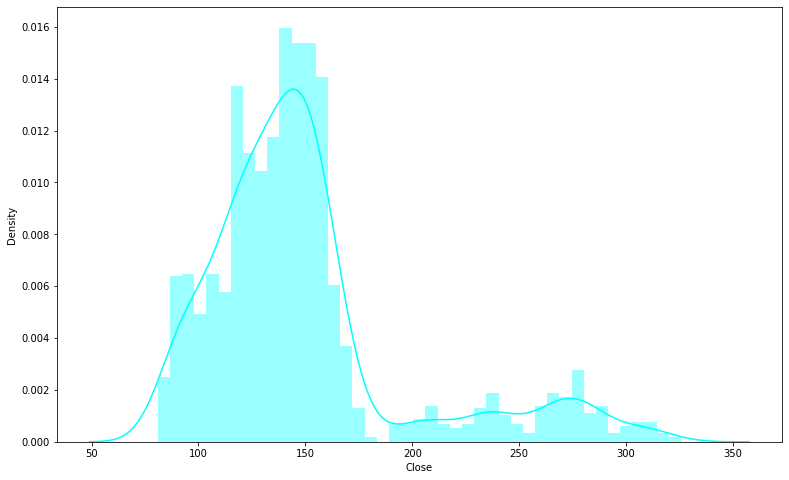

In [13]:
# Distribution of Closing Price
plt.figure(figsize=(13,8))
sns.distplot(df1['Close'], color = 'cyan')

## Lag Plot

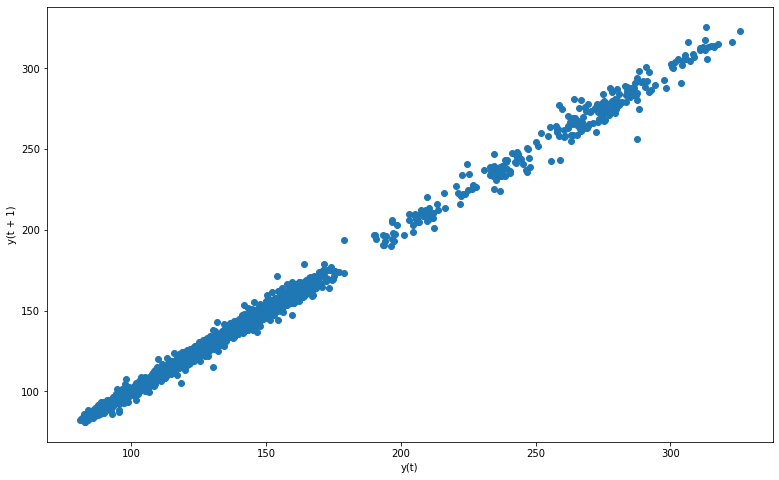

In [14]:
# Lag Plot
from pandas.plotting import lag_plot
plt.figure(figsize=(13,8))
lag_plot(df1['Close'])
ax = plt.axes()
plt.show()

## ACF and PACF plot

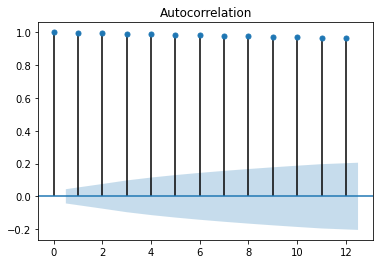

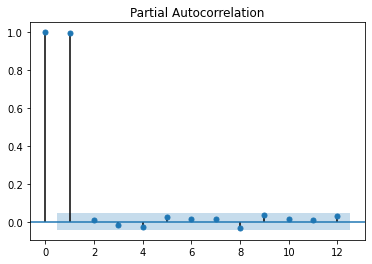

In [15]:
# ACF and PACF plot
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df1.Close,lags=12)
ax = plt.axes()
tsa_plots.plot_pacf(df1.Close,lags=12)
ax = plt.axes()
plt.show()

## Decomposition of the Close Price

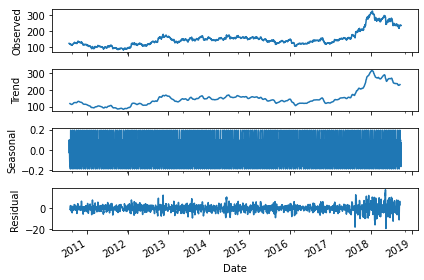

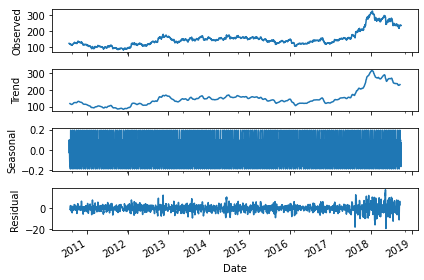

In [16]:
# Decomposition of the Close price
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts = seasonal_decompose(df1.Close, freq = 12)
decompose_ts.plot()

#### No Trend or Seasonality can be observed.

# Data Pre-processing

## 1. Data Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1['Close'] = scaler.fit_transform(np.array(df1['Close']).reshape(-1,1))

In [18]:
df1.head()

,Close
Date,
2010-07-21,0.165850
2010-07-22,0.163194
2010-07-23,0.162173
2010-07-26,0.149714
2010-07-27,0.154003


## 2. Data Splitting

### a. Into Train and Test data

In [19]:
training_size = int(len(df1) * 0.65)      # 65% of length of data
test_size = len(df1) - training_size      # 35% of length of data
train_data, test_data = df1.iloc[0:training_size, :], df1.iloc[training_size:len(df1), :]

In [20]:
training_size,test_size

(1322, 713)

In [21]:
train_data[:5]

,Close
Date,
2010-07-21,0.165850
2010-07-22,0.163194
2010-07-23,0.162173
2010-07-26,0.149714
2010-07-27,0.154003


In [22]:
train_data = np.array(train_data['Close'])
test_data = np.array(test_data['Close'])

In [23]:
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

### b. Into independent and dependent variables

In [24]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]    
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [25]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [26]:
X_train.shape, y_train.shape

((1221, 100), (1221,))

In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Modelling

## Creating the Stacked LSTM Model

In [28]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM , Dropout
from keras.wrappers.scikit_learn import KerasRegressor

In [29]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.1))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(50))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 100)          40800     
_________________________________________________________________
dropout (Dropout)            (None, 100, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           30200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [31]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=20,verbose=1)

Epoch 1/50
62/62 [==============================] - 20s 226ms/step - loss: 0.0039 - val_loss: 0.0052
Epoch 2/50
62/62 [==============================] - 13s 207ms/step - loss: 0.0011 - val_loss: 0.0086
Epoch 3/50
62/62 [==============================] - 13s 204ms/step - loss: 9.9863e-04 - val_loss: 0.0177
Epoch 4/50
62/62 [==============================] - 13s 207ms/step - loss: 0.0011 - val_loss: 0.0050
Epoch 5/50
62/62 [==============================] - 13s 204ms/step - loss: 8.9340e-04 - val_loss: 0.0044
Epoch 6/50
62/62 [==============================] - 13s 203ms/step - loss: 9.6116e-04 - val_loss: 0.0021
Epoch 7/50
62/62 [==============================] - 13s 204ms/step - loss: 8.1845e-04 - val_loss: 0.0043
Epoch 8/50
62/62 [==============================] - 12s 201ms/step - loss: 7.1649e-04 - val_loss: 0.0028
Epoch 9/50
62/62 [==============================] - 12s 201ms/step - loss: 7.0084e-04 - val_loss: 0.0054
Epoch 10/50
62/62 [==============================] - 12s 199ms/step

## Making Predictions

In [32]:
# Making Predictions
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
# Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

## RMSE Score

In [34]:
# Calculating RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

134.82462789822054

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

195.0004973316675

# Experimental Analysis

## Plotting predictions on testing data

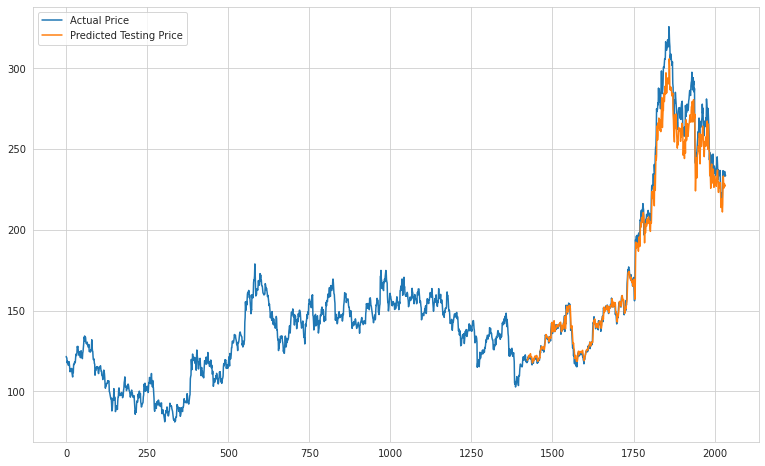

In [36]:
# Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize = (13,8))
sns.set_style('whitegrid')
plt.plot(scaler.inverse_transform(df1) , label = 'Actual Price')
# plt.plot(trainPredictPlot)
plt.plot(testPredictPlot, label = 'Predicted Testing Price')
plt.legend()
plt.show()

In [37]:
len(test_data)

713

In [38]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input[:5]

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386]

## Forecasting the Close Price for next 30 days

In [41]:
# Taking previous 100 close prices as input and predicting 101st as output
# then taking 1st to 101st close prices as input and predicting 102nd as output and so on...

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
len(df1)

2035

## Forecast for next 30 days wrt previous 100 days Close Price

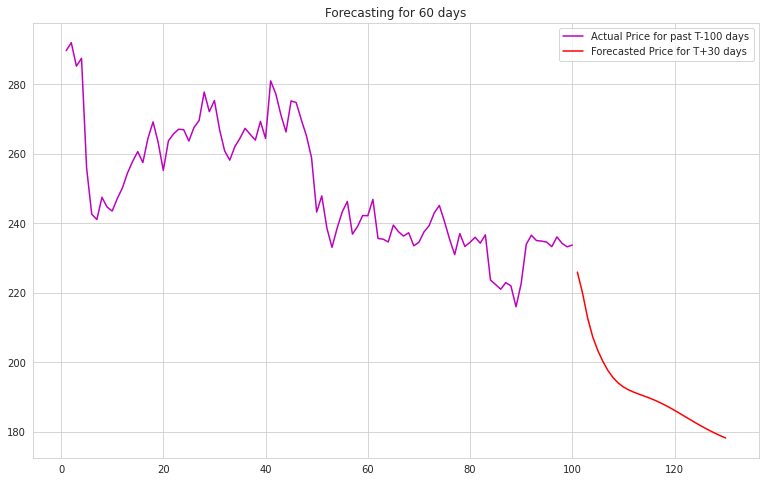

In [92]:
plt.figure(figsize = (13,8))
plt.plot(day_new,scaler.inverse_transform(df1[1935:]), color = 'm' , label = 'Actual Price for past T-100 days')
plt.plot(day_pred,scaler.inverse_transform(lst_output), color = 'red', label = 'Forecasted Price for T+30 days ')
plt.title('Forecasting for 60 days')
plt.legend()

In [91]:
from datetime import datetime
import datetime as dt
lst = list(df1.index)
numdays = 30
date_list = [lst[-1] + dt.timedelta(days=x) for x in range(numdays)]

In [94]:
forecast = pd.DataFrame(scaler.inverse_transform(lst_output) , columns = ['Close'] , index = date_list)
forecast.head()

,Close
2018-09-28,225.980744
2018-09-29,219.996550
2018-09-30,212.805225
2018-10-01,207.339837
2018-10-02,203.396984


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date'], inplace=True)

## Line plot of Close Price over the years with forecasted value for next 30 days

<Figure size 936x576 with 0 Axes>

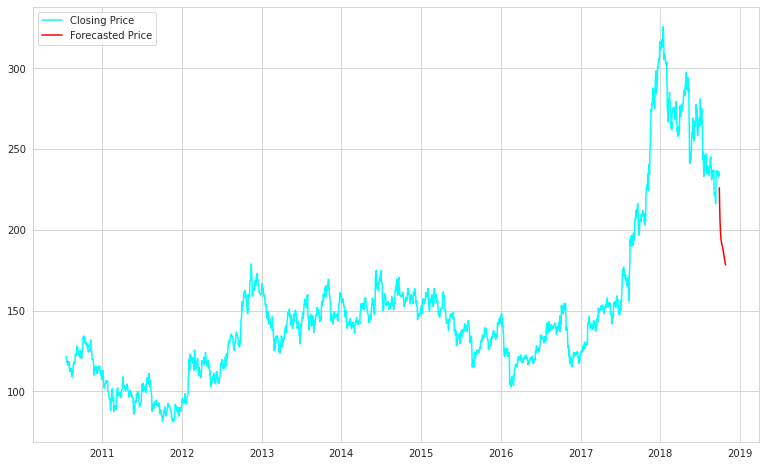

In [105]:
plt.figure(figsize=(13,8))
_, ax = plt.subplots(figsize= (13,8))
ax.plot(df['Close'], label = 'Closing Price', color = 'cyan')
ax.plot(forecast['Close'], label = 'Forecasted Price', color = 'red')
plt.legend()